Task 1

Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.

Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#Statistical analysis
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.shape

(150, 6)

In [14]:
#Data preprocessing
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [15]:
iris.duplicated().sum()

0

In [16]:
iris.value_counts()

,,,,,,count
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
95,5.6,2.7,4.2,1.3,Iris-versicolor,1
97,5.7,2.9,4.2,1.3,Iris-versicolor,1
98,6.2,2.9,4.3,1.3,Iris-versicolor,1
99,5.1,2.5,3.0,1.1,Iris-versicolor,1
...,...,...,...,...,...,...
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
52,6.4,3.2,4.5,1.5,Iris-versicolor,1
53,6.9,3.1,4.9,1.5,Iris-versicolor,1


In [17]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
#Display the number of sample for each species
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [19]:
#Converting class labels into numerical form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
iris["Species"].head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [20]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

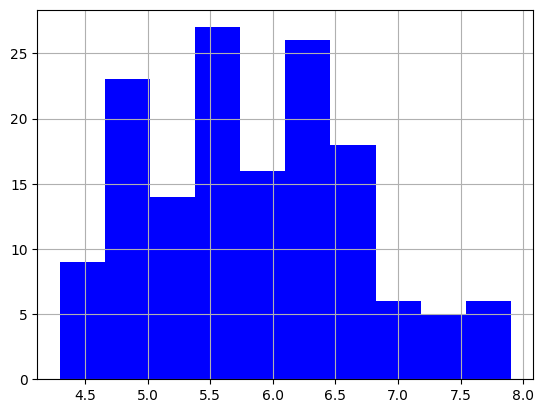

In [21]:
#Histogram for every feature
iris["SepalLengthCm"].hist(color = "blue")

<Axes: >

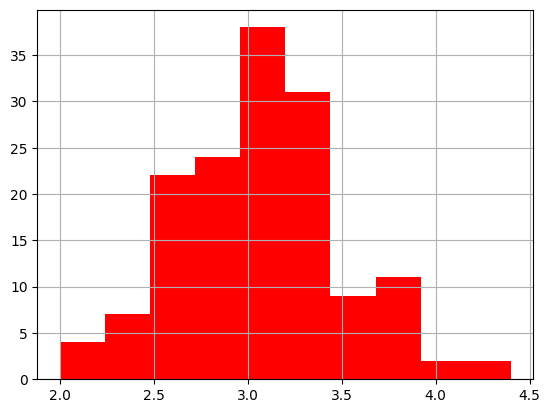

In [22]:
iris["SepalWidthCm"].hist(color = "red")

<Axes: >

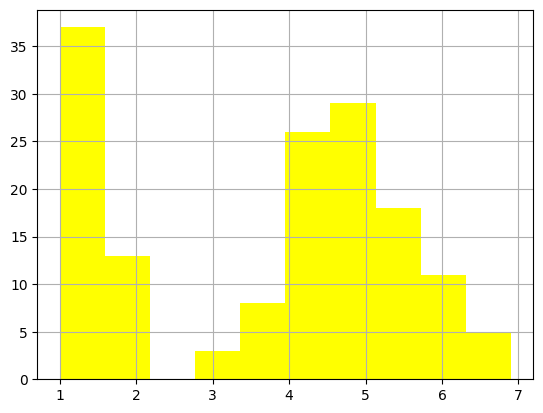

In [23]:
iris["PetalLengthCm"].hist(color = "yellow")

<Axes: >

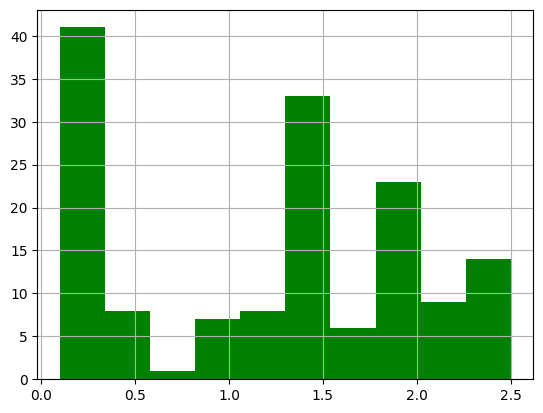

In [24]:
iris["PetalWidthCm"].hist(color = "green")

<Axes: >

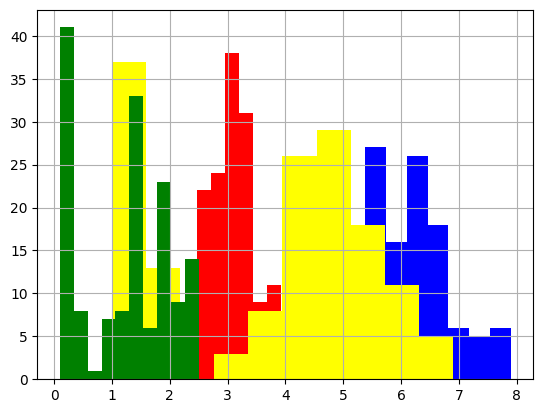

In [25]:
#Plotting histogram for all features
iris["SepalLengthCm"].hist(color = "blue")
iris["SepalWidthCm"].hist(color = "red")
iris["PetalLengthCm"].hist(color = "yellow")
iris["PetalWidthCm"].hist(color = "green")

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

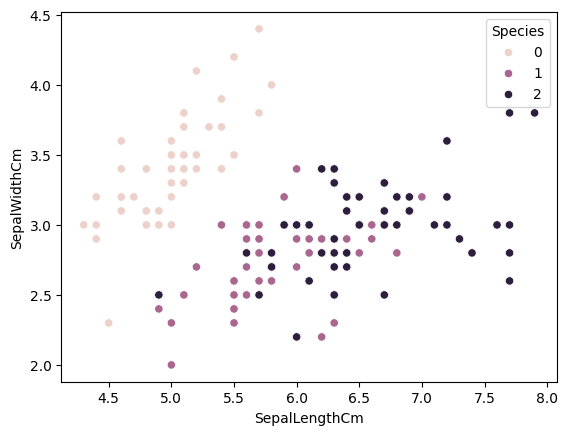

In [26]:
#Create a scatterplot
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species", data = iris)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

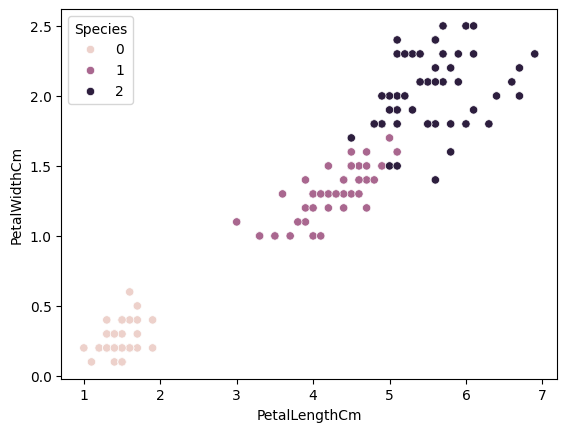

In [27]:
#Shows the relationship between Petal length and petal width in three distinguished species
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = "Species", data = iris)

Correlation Matrix

A correlation matrix is a table that displays the correlation coefficients between different variables in a dataset. Correlation coefficients quantify the strength and direction of the linear relationship between two variables.

The values typically range from -1 to 1, where:

1: Shows a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.

0: Shows no correlation, indicating that there's no linear relationship between the variables.

-1: Shows a perfect negative correlation, implying that as one variable increases, the other variable decreases proportionally.

In [28]:
#Correlation matrix
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


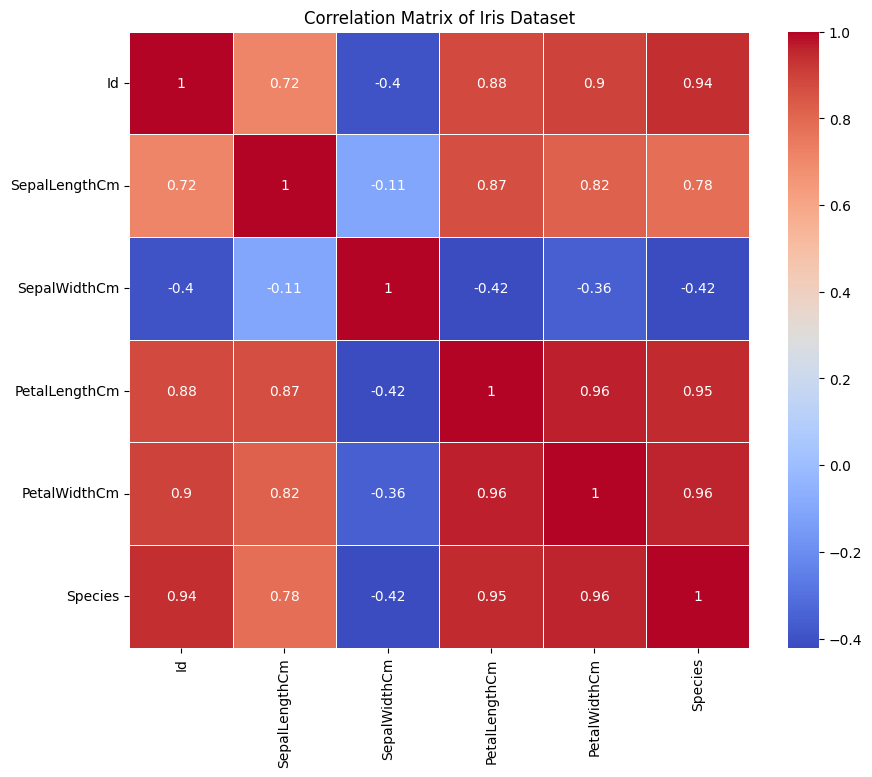

In [29]:
# Plot the correlation matrix using seaborn
correlation_matrix = iris.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

<Axes: >

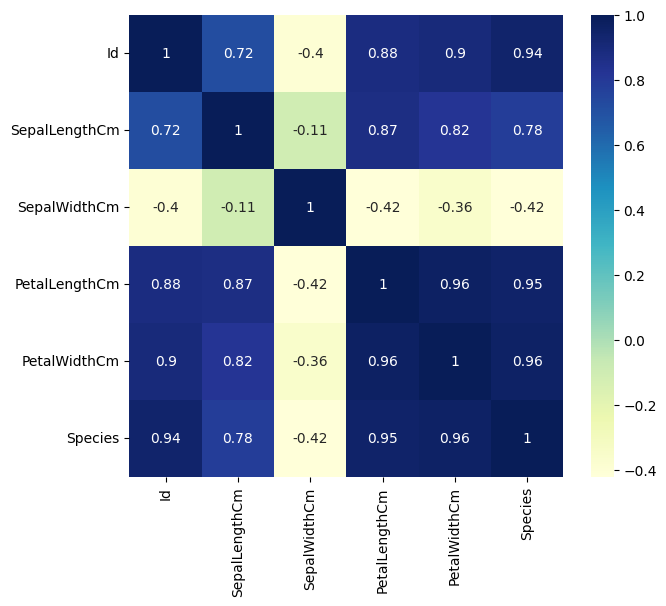

In [30]:
# correlation matrix using heatmap
corr=iris.corr()
fig, ax=plt.subplots(figsize=(7,6))
sns.heatmap(corr,annot=True,ax=ax,cmap='YlGnBu')

# Model Training

In [31]:
#Splitting the data into features of X and target Y
X = iris.drop('Species' , axis=1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [32]:
Y = iris['Species']
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

Accuracy: 1.00


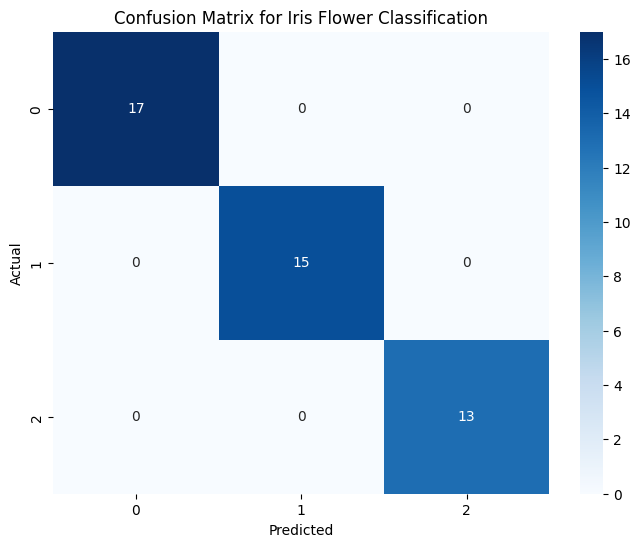

In [34]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, Y_train)

# Predict the test set results
Y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Print the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris['Species'].unique(), yticklabels=iris['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris Flower Classification')
plt.show()

The heatmap having colors ranging from dark blue (strong negative correlation) to dark red (strong positive correlation), with white or light colors representing weaker correlations near zero. Each cell will also have the correlation coefficient value printed inside it.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and logistic regression
model2 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500))

# Fit the model to the training data
model2.fit(X_train, Y_train)

# Calculate the accuracy on the test data
accuracy = model2.score(X_test, Y_test) * 100
print("Accuracy (Logistic Regression): {:.2f}%".format(accuracy))

Accuracy (Logistic Regression): 100.00%


In [37]:
#K-nearest modell(KNN)
from sklearn.neighbors import KNeighborsClassifier
model3= KNeighborsClassifier()
model3.fit(X_train,Y_train)
print("Accuracy (KNN): ",model3.score(X_test,Y_test)*100)

Accuracy (KNN):  100.0


In [38]:
# Using Decision tree model
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train, Y_train)
print("Accuracy (DecisionTree): ", model4.score(X_test,Y_test)*100)

Accuracy (DecisionTree):  100.0
